In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam


In [7]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 [==============================] - 2s 0us/step


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 77s 48ms/step - loss: 1.7082 - accuracy: 0.3671 - val_loss: 1.4165 - val_accuracy: 0.4764
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3904 - accuracy: 0.5006 - val_loss: 1.1894 - val_accuracy: 0.5679
Epoch 3/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.2627 - accuracy: 0.5503 - val_loss: 1.1290 - val_accuracy: 0.5974
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1747 - accuracy: 0.5881 - val_loss: 1.0247 - val_accuracy: 0.6353
Epoch 5/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.0934 - accuracy: 0.6148 - val_loss: 1.0251 - val_accuracy: 0.6388
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0346 - accuracy: 0.6389 - val_loss: 0.9541 - val_accuracy: 0.6631
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9809 - accuracy: 0.6586 - val_loss: 0.9391 -

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 4s - loss: 0.8969 - accuracy: 0.6901 - 4s/epoch - 11ms/step
Test accuracy: 0.6901000142097473


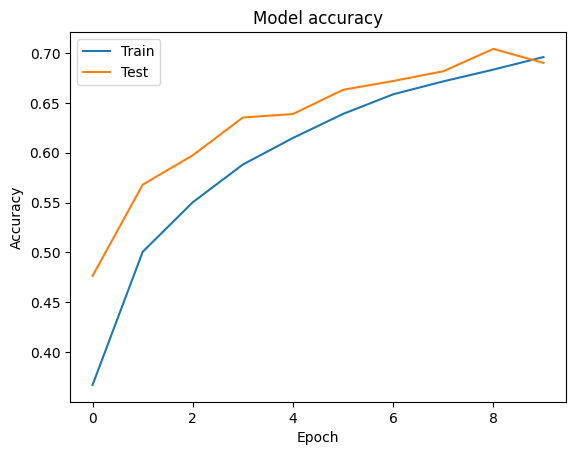

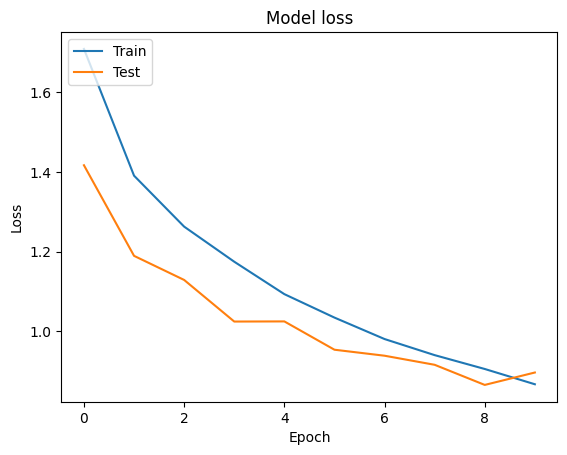

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
